<a href="https://colab.research.google.com/github/rpalivela/neural-style-transfer/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pystiche

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import pystiche
from pystiche import demo, enc, loss, ops, optim
from pystiche.image import read_image, write_image, show_image

print(f"pystiche=={pystiche.__version__}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pystiche==1.0.1


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "


In [3]:
multi_layer_encoder = enc.vgg19_multi_layer_encoder()
print(multi_layer_encoder)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGGMultiLayerEncoder(
  arch=vgg19, framework=torch
  (preprocessing): TorchPreprocessing(
    (0): Normalize(mean=('0.485', '0.456', '0.406'), std=('0.229', '0.224', '0.225'))
  )
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU()
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU()
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_2): ReLU()
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3

In [4]:
content_layer = "relu4_2"
encoder = multi_layer_encoder.extract_encoder(content_layer)
content_loss = ops.FeatureReconstructionOperator(encoder)

/usr/local/lib/python3.7/dist-packages/pystiche/ops/__init__.py:29: UserWarning: The class pystiche.ops.FeatureReconstructionOperator is deprecated since pystiche==1.0 and will be removed in a future release. It was renamed and moved to pystiche.loss.FeatureReconstructionLoss. See https://github.com/pystiche/pystiche/issues/436 for details
  warnings.warn(msg)


In [5]:
style_layers = ("relu1_1", "relu2_1", "relu3_1", "relu4_1", "relu5_1")
style_weight = 1e3


def get_encoding_op(encoder, layer_weight):
    return ops.GramOperator(encoder, score_weight=layer_weight)


style_loss = ops.MultiLayerEncodingOperator(
    multi_layer_encoder, style_layers, get_encoding_op, score_weight=style_weight,
)

/usr/local/lib/python3.7/dist-packages/pystiche/ops/__init__.py:29: UserWarning: The class pystiche.ops.MultiLayerEncodingOperator is deprecated since pystiche==1.0 and will be removed in a future release. It was renamed and moved to pystiche.loss.MultiLayerEncodingLoss. See https://github.com/pystiche/pystiche/issues/436 for details
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pystiche/ops/__init__.py:29: UserWarning: The class pystiche.ops.GramOperator is deprecated since pystiche==1.0 and will be removed in a future release. It was renamed and moved to pystiche.loss.GramLoss. See https://github.com/pystiche/pystiche/issues/436 for details
  warnings.warn(msg)


In [6]:
criterion = loss.PerceptualLoss(content_loss, style_loss).to(device)
print(criterion)

PerceptualLoss(
  (content_loss): FeatureReconstructionOperator(
    (encoder): VGGMultiLayerEncoder(layer=relu4_2, arch=vgg19, framework=torch)
  )
  (style_loss): MultiLayerEncodingOperator(
    encoder=VGGMultiLayerEncoder(arch=vgg19, framework=torch), score_weight=1000
    (relu1_1): GramOperator(score_weight=0.2)
    (relu2_1): GramOperator(score_weight=0.2)
    (relu3_1): GramOperator(score_weight=0.2)
    (relu4_1): GramOperator(score_weight=0.2)
    (relu5_1): GramOperator(score_weight=0.2)
  )
)


In [7]:
size = 500
images = demo.images()

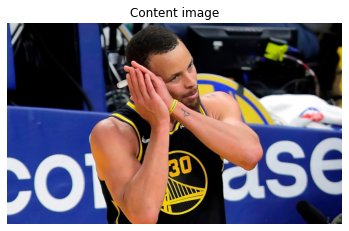

In [8]:
content_image = read_image("steph.webp", size=size, device=device)
criterion.set_content_image(content_image)
show_image(content_image, title="Content image")

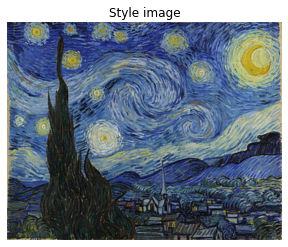

In [9]:
style_image = read_image("starrynight.jpg", size=size, device=device)
criterion.set_style_image(style_image)
show_image(style_image, title="Style image")

In [10]:
input_image = content_image.clone() 
output_image = optim.image_optimization(input_image, criterion, num_steps=500)
write_image(output_image, "starrysteph.jpg")

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

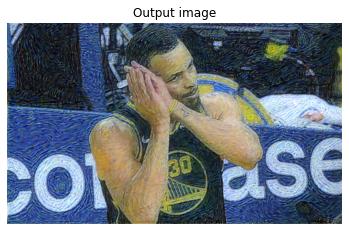

In [11]:
show_image(output_image, title="Output image")